<a href="https://colab.research.google.com/github/samanehPahlavani/MscFraudDetection/blob/main/LastEtereumCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect Google Drive For Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Libraries











In [18]:
####Libraries Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os

%matplotlib inline
import sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold

In [20]:
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVR

In [22]:
from sklearn import metrics # for checking the model accuracy

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
!pip install pandas_ml

In [25]:
# Import the necessary libraries
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB


In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import train_test_split, KFold

In [27]:
import time

# Functions Def

In [28]:
def LoadData(data):
  warnings.filterwarnings('ignore')
  pd.options.display.max_columns = None
  pd.options.display.max_rows = None
  df = pd.read_csv(os.path.join("/content/drive/MyDrive/EtherFirstDataSet/", data+".csv"))
  return df
#Load datas
def preprocessing():

  df1 = LoadData(str(1))
  df2 = LoadData(str(2))

  df1_fillna = df1.copy()
  df2_fillna = df2.copy()

  #Drop Most None Related Value Features
  df1_fillna.drop(["ERC20_uniq_rec_token_name","ERC20_uniq_sent_token_name","ERC20_avg_val_sent","ERC20_max_val_sent","ERC20_min_val_sent","ERC20_avg_val_rec","ERC20_max_val_rec","ERC20_min_val_rec","ERC20_uniq_rec_contract_addr","ERC20_uniq_sent_addr_1","ERC20_uniq_sent_addr","ERC20_total_Ether_sent_contract","ERC20_total_ether_sent","ERC20_total_Ether_received","ERC20_most_rec_token_type","ERC20_most_sent_token_type"], axis=1, inplace=True)
  df1_fillna.drop(["ERC20_uniq_rec_addr","Total_ERC20_tnxs","Time_Diff_between_first_and_last_Mins","total_ether_sent_contracts"], axis=1, inplace=True)
  df2_fillna.drop(["minTimeBetweenSentTnx","maxTimeBetweenSentTnx","minTimeBetweenRecTnx","maxTimeBetweenRecTnx","lifetime","activityDays","dailyMax","ratioRecSent","ratioSentTotal","ratioRecTotal","giniSent","giniRec","txFreq","stdBalanceEth"], axis=1, inplace=True)

  #Rename Columns
  selected_columns = ["address","flag","avgTimeBetweenRecTnx","avgTimeBetweenSentTnx","sentTransactions" ,"receivedTransactions", "createdContracts" ,"Average_of_numUniqRecAddress" ,"Average_of_numUniqSentAddress"
  ,"minValReceived"
  ,"maxValReceived"
  ,"avgValReceived"
  , "minValSent"
  , "maxValSent"
  ,"avgValSent"
  ,"totalTransactions"
  ,"totalEtherSent"
  ,"totalEtherReceived"
  ,"totalEtherBalance"    ]

  df2_fillna = df2[selected_columns].copy()

  df2_fillna.columns = ["Address"
  ,"FLAG"
  ,"Avg_min_between_received_tnx"
  ,"Avg_min_between_sent_tnx"
  ,"Sent_tnx"
  ,"Received_Tnx"
  ,"Number_of_Created_Contracts"
  ,"Average_of_Unique_Received_From_Addresses"
  ,"Average_of_Unique_Sent_To_Addresses"
  ,"min_value_received"
  ,"max_value_received "
  ,"avg_val_received"
  ,"min_val_sent"
  ,"max_val_sent"
  ,"avg_val_sent"
  ,"total_transactions_including_tnx_to_create_contract"
  ,"total_Ether_sent"
  ,"total_ether_received"
  ,"total_ether_balance"
  ]

  merged_df = pd.merge(df1_fillna, df2_fillna, how='outer')
  df_filtered = merged_df.drop_duplicates(subset='Address', keep='first')
  return df_filtered



In [29]:
def scaled(data):
  # Convert categorical 'FLAG' to numeric
  label_encoder = LabelEncoder()
  data['FLAG'] = label_encoder.fit_transform(data['FLAG'])

  # Splitting the data into features (X) and labels (y)
  X =  data.drop(['FLAG'], axis=1)
  y = data['FLAG']

  # Standardize features
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)
  #X_scaled['FLAG'] = y


  return X_scaled,y

In [30]:
def undersampling(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply undersampling
    undersampler = RandomUnderSampler()
    X_resampled, y_resampled = undersampler.fit_resample(X, y)

    # Get indices of selected samples
    selected_indices = undersampler.sample_indices_

    # Get indices of unselected samples
    unselected_indices = np.setdiff1d(np.arange(len(X)), selected_indices)

    # Extract unselected samples
    X_unselected = X.iloc[unselected_indices]
    y_unselected = y.iloc[unselected_indices]

    # Combine unselected data into a DataFrame
    unselected_data = pd.concat([X_unselected, y_unselected], axis=1)
    resampled = pd.concat([X_resampled, y_resampled], axis=1)
    return resampled, unselected_data

In [31]:
def oversampling(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply oversampling
    oversampler = RandomOverSampler()
    X_resampled, y_resampled = oversampler.fit_resample(X, y)

    # Get indices of selected samples
    selected_indices = oversampler.sample_indices_

    # Get indices of unselected samples
    unselected_indices = np.setdiff1d(np.arange(len(X)), selected_indices)

    # Extract unselected samples
    X_unselected = X.iloc[unselected_indices]
    y_unselected = y.iloc[unselected_indices]

    # Combine unselected data into a DataFrame
    unselected_data = pd.concat([X_unselected, y_unselected], axis=1)
    resampled = pd.concat([X_resampled, y_resampled], axis=1)

    return resampled, unselected_data

In [32]:
def smote(data, target_column):
    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # Apply SMOTE
    smote = SMOTE()
    X_resampled, y_resampled = smote.fit_resample(X, y)

    # Combine resampled data into a DataFrame
    resampled_data = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name=target_column)], axis=1)
    return resampled_data,''

In [33]:
def ballanced(data,type="O"):

  if type=="U":
    resampled, unselected_data = undersampling(data, 'FLAG')
  elif type=="S":
    resampled, unselected_data  = smote(data, 'FLAG')
  elif type=="O":
    resampled, unselected_data = oversampling(data, 'FLAG')


  return resampled, unselected_data


#**Preprocessing **

In [34]:
df_filtered = preprocessing()
df_filtered = df_filtered.drop(['Address'], axis=1)

**Imballanced Dataset**

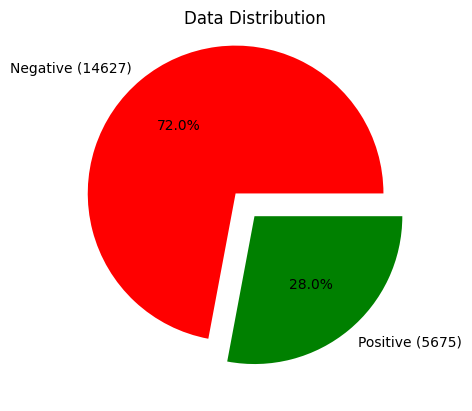

In [35]:
df = df_filtered
positive_sample = df[(df["FLAG"]==1)]
negative_sample = df[(df["FLAG"]==0)]
dist = df["FLAG"].value_counts()

_ = plt.pie(dist, labels = ["Negative ({0})".format(len(negative_sample)), "Positive ({0})".format(len(positive_sample))], colors = ["r", "g"], explode=[0.2, 0], autopct='%1.1f%%')
_ = plt.title("Data Distribution")

In [36]:
#df_filtered = np.array(df_filtered)
df_filtered.shape

(20302, 18)

In [37]:
resampledOver, unselected_Over = ballanced(df_filtered,"O")
resampledOver.shape

(29254, 18)

In [38]:
X_reshapedO,y_reshapedO = scaled(resampledOver)
X_reshapedO.shape

(29254, 17)

In [39]:
X_trainO, X_testO, y_trainO, y_testO =  train_test_split(X_reshapedO, y_reshapedO, test_size=0.1, random_state=42)

# #**Models**

CNN

In [62]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import roc_curve, roc_auc_score
#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [63]:
X = np.concatenate([X_trainO, X_testO], axis=0)
y = np.concatenate([y_trainO, y_testO], axis=0)
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)

In [64]:

# Reshape X to 3D for CNN input
X_reshaped = X.reshape(X.shape[0],X.shape[1], 1)


In [65]:
# Build the CNN model
model_1 = Sequential()
model_1.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Conv1D(64, kernel_size=3, activation='relu'))
model_1.add(MaxPooling1D(pool_size=2))
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(1, activation='sigmoid'))

In [66]:
model_2 = Sequential()
model_2.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_reshaped.shape[1], 1)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Conv1D(64, kernel_size=3, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid'))

In [67]:
kf = KFold(n_splits=10, random_state = 42, shuffle=True)
fld = 1

In [68]:
optimizer = Adam(learning_rate=0.0001)

In [69]:
accuracies = []
history = []
losses = []
val_accuracies = []
val_losses = []
resultCNN  = {}

for train_index, test_index in kf.split(X):
        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        Training_time = time.time() - start_time

        start_time = time.time()
        history = model_1.fit(X_trainV, y_trainV, validation_data=(X_testV, y_testV), epochs=10, batch_size=32, verbose=0)

        Inference_Time = time.time() - start_time

        accuracies.append(history.history['accuracy'][-1])
        losses.append(history.history['loss'][-1])
        val_accuracies.append(history.history['val_accuracy'][-1])
        val_losses.append(history.history['val_loss'][-1])

        y_predictCNN = model_1.predict(X_testV)

        y_predictCNN_binary = np.where(y_predictCNN > 0.5, 1, 0)

        # Now use these binary predictions for calculating metrics
        accuracy = accuracy_score(y_testV, y_predictCNN_binary)
        precision = precision_score(y_testV, y_predictCNN_binary)
        recall = recall_score(y_testV, y_predictCNN_binary)
        f1 = f1_score(y_testV, y_predictCNN_binary)
        kappa = cohen_kappa_score(y_testV, y_predictCNN_binary)
        conf_mat = confusion_matrix(y_testV, y_predictCNN_binary)
        roc_auc = roc_auc_score(y_testV, y_predictCNN_binary)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predictCNN_binary)



        resultCNN[f'Model_{fld}'] = {'Matrix': conf_mat, 'accuracy': accuracy, 'precision': precision,
                                  'recall': recall, 'f1': f1, 'kappa': kappa, 'roc_auc': roc_auc,'fpr':fpr
                                     ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}


        # Print metrics for the LR model
        print(f'Metrics for LR Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(conf_mat)
        print("********************************************************************")

        fld = fld + 1

92/92 [==============================] - 0s 2ms/step
Metrics for LR Model Fold 1:
Inference Time: 47.3141 seconds
training Time: 0.0154 seconds
Accuracy: 0.79
Precision: 0.72
Recall: 0.96
F1-score: 0.82
kappa: 0.58
ROC AUC: 0.79
fpr: [0.         0.38164251 1.        ]
tpr: [0.         0.95937712 1.        ]
thresholds: [2 1 0]
[[ 896  553]
 [  60 1417]]
********************************************************************
92/92 [==============================] - 0s 2ms/step
Metrics for LR Model Fold 2:
Inference Time: 36.8189 seconds
training Time: 0.0082 seconds
Accuracy: 0.83
Precision: 0.81
Recall: 0.85
F1-score: 0.83
kappa: 0.66
ROC AUC: 0.83
fpr: [0.         0.19376694 1.        ]
tpr: [0.         0.85241379 1.        ]
thresholds: [2 1 0]
[[1190  286]
 [ 214 1236]]
********************************************************************
92/92 [==============================] - 0s 2ms/step
Metrics for LR Model Fold 3:
Inference Time: 46.0990 seconds
training Time: 0.0128 seconds
Accura

In [71]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultCNN.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.86
Worst Accuracy: 0.79
Average Accuracy: 0.84
************************************************
Best Precision: 0.85
Worst Precision: 0.72
Average Precision: 0.79
************************************************
Best Recall: 0.96
Worst Recall: 0.85
Average Recall: 0.93
************************************************
Best F1 Score: 0.87
Worst F1 Score: 0.82
Average F1 Score: 0.85
************************************************
Best Kappa: 0.72
Worst Kappa: 0.58
Average Kappa: 0.68
************************************************
Best Inference_Time: 47.55712
Worst Inference_Time: 35.81373
Average Inference_Time: 42.73311
************************************************
Best Training_time: 0.01539
Worst Training_time: 0.00716
Average Training_time: 0.01043
************************************************
Best roc_auc: 0.86
Worst roc_auc: 0.79
Average roc_auc: 0.84


In [74]:
accuracies = []
history = []
losses = []
val_accuracies = []
val_losses = []
resultCNN  = {}

for train_index, test_index in kf.split(X):
        X_trainV, X_testV = X_df.iloc[train_index], X_df.iloc[test_index]
        y_trainV, y_testV = y_df.iloc[train_index], y_df.iloc[test_index]

        start_time = time.time()
        model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)

        Training_time = time.time() - start_time

        start_time = time.time()
        #history = model.fit(X_trainV, y_trainV, validation_data=(X_testV, y_testV), epochs=10, batch_size=32, verbose=0)
        history = model_2.fit(X_trainV, y_trainV, validation_data=(X_testV, y_testV), epochs=100, batch_size=32, verbose=1, callbacks=[early_stopping])

        Inference_Time = time.time() - start_time

        accuracies.append(history.history['accuracy'][-1])
        losses.append(history.history['loss'][-1])
        val_accuracies.append(history.history['val_accuracy'][-1])
        val_losses.append(history.history['val_loss'][-1])

        y_predictCNN = model_2.predict(X_testV)

        y_predictCNN_binary = np.where(y_predictCNN > 0.5, 1, 0)

        # Now use these binary predictions for calculating metrics
        accuracy = accuracy_score(y_testV, y_predictCNN_binary)
        precision = precision_score(y_testV, y_predictCNN_binary)
        recall = recall_score(y_testV, y_predictCNN_binary)
        f1 = f1_score(y_testV, y_predictCNN_binary)
        kappa = cohen_kappa_score(y_testV, y_predictCNN_binary)
        conf_mat = confusion_matrix(y_testV, y_predictCNN_binary)
        roc_auc = roc_auc_score(y_testV, y_predictCNN_binary)
        fpr, tpr, thresholds = roc_curve(y_testV, y_predictCNN_binary)



        resultCNN[f'Model_{fld}'] = {'Matrix': conf_mat, 'accuracy': accuracy, 'precision': precision,
                                  'recall': recall, 'f1': f1, 'kappa': kappa, 'roc_auc': roc_auc,'fpr':fpr
                                     ,'tpr':tpr,'thresholds':thresholds,'Inference_Time':Inference_Time,'Training_time':Training_time}


        # Print metrics for the LR model
        print(f'Metrics for LR Model Fold {fld}:')
        print(f"Inference Time: {Inference_Time:.4f} seconds")
        print(f"training Time: {Training_time:.4f} seconds")
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision: {precision:.2f}")
        print(f"Recall: {recall:.2f}")
        print(f"F1-score: {f1:.2f}")
        print(f"kappa: {kappa:.2f}")
        print(f"ROC AUC: {roc_auc:.2f}")
        print(f"fpr: {fpr}")
        print(f"tpr: {tpr}")
        print(f"thresholds: {thresholds}")
        print(conf_mat)
        print("********************************************************************")

        fld = fld + 1

Epoch 1/100
823/823 [==============================] - 6s 6ms/step - loss: 0.3815 - accuracy: 0.8135 - val_loss: 0.3839 - val_accuracy: 0.8134
Epoch 2/100
823/823 [==============================] - 5s 6ms/step - loss: 0.3871 - accuracy: 0.8101 - val_loss: 0.4735 - val_accuracy: 0.7184
Epoch 3/100
823/823 [==============================] - 4s 5ms/step - loss: 0.3781 - accuracy: 0.8138 - val_loss: 0.4892 - val_accuracy: 0.7341
Epoch 4/100
823/823 [==============================] - 4s 5ms/step - loss: 0.3724 - accuracy: 0.8173 - val_loss: 0.5026 - val_accuracy: 0.7690
Epoch 5/100
823/823 [==============================] - 5s 6ms/step - loss: 0.3701 - accuracy: 0.8184 - val_loss: 0.4015 - val_accuracy: 0.8008
Epoch 6/100
823/823 [==============================] - 4s 4ms/step - loss: 0.3657 - accuracy: 0.8204 - val_loss: 0.6368 - val_accuracy: 0.7509
Epoch 7/100
823/823 [==============================] - 4s 5ms/step - loss: 0.3645 - accuracy: 0.8205 - val_loss: 0.4466 - val_accuracy: 0.7929

In [75]:
# Initialize lists to store metric values
accuracies = []
precisions = []
recalls = []
f1_scores = []
kappas = []
Inference_Time = []
Training_time = []
roc_auc = []
# Loop over the results dictionary
for model, metrics in resultCNN.items():
    accuracies.append(metrics['accuracy'])
    precisions.append(metrics['precision'])
    recalls.append(metrics['recall'])
    f1_scores.append(metrics['f1'])
    kappas.append(metrics['kappa'])
    Inference_Time.append(metrics['Inference_Time'])
    Training_time.append(metrics['Training_time'])
    roc_auc.append(metrics['roc_auc'])

# Calculate the best, worst, and average values for each metric
best_accuracy = round(max(accuracies), 2)
worst_accuracy = round(min(accuracies), 2)
average_accuracy = round(sum(accuracies) / len(accuracies), 2)


best_precision = round(max(precisions), 2)
worst_precision = round(min(precisions), 2)
average_precision = round(sum(precisions) / len(precisions), 3)

best_recall = round(max(recalls), 2)
worst_recall = round(min(recalls), 2)
average_recall = round(sum(recalls) / len(recalls), 2)

best_f1_score = round(max(f1_scores), 2)
worst_f1_score = round(min(f1_scores), 2)
average_f1_score = round(sum(f1_scores) / len(f1_scores), 2)

best_kappa = round(max(kappas), 2)
worst_kappa = round(min(kappas), 2)
average_kappa = round(sum(kappas) / len(kappas), 2)

best_Inference_Time = round(max(Inference_Time), 5)
worst_Inference_Time = round(min(Inference_Time), 5)
average_Inference_Time = round(sum(Inference_Time) / len(Inference_Time), 5)


best_Training_time = round(max(Training_time), 5)
worst_Training_time = round(min(Training_time), 5)
average_Training_time = round(sum(Training_time) / len(Training_time), 5)

best_roc_auc = round(max(roc_auc), 2)
worst_roc_auc = round(min(roc_auc), 2)
average_roc_auc = round(sum(roc_auc) / len(roc_auc), 2)

# Print the results
print("Best Accuracy:", best_accuracy)
print("Worst Accuracy:", worst_accuracy)
print("Average Accuracy:", average_accuracy)

print("************************************************")


print("Best Precision:", best_precision)
print("Worst Precision:", worst_precision)
print("Average Precision:", average_precision)
print("************************************************")

print("Best Recall:", best_recall)
print("Worst Recall:", worst_recall)
print("Average Recall:", average_recall)
print("************************************************")

print("Best F1 Score:", best_f1_score)
print("Worst F1 Score:", worst_f1_score)
print("Average F1 Score:", average_f1_score)
print("************************************************")

print("Best Kappa:", best_kappa)
print("Worst Kappa:", worst_kappa)
print("Average Kappa:", average_kappa)

print("************************************************")

print("Best Inference_Time:", best_Inference_Time)
print("Worst Inference_Time:", worst_Inference_Time)
print("Average Inference_Time:", average_Inference_Time)
print("************************************************")

print("Best Training_time:", best_Training_time)
print("Worst Training_time:", worst_Training_time)
print("Average Training_time:", average_Training_time)
print("************************************************")

print("Best roc_auc:", best_roc_auc)
print("Worst roc_auc:", worst_roc_auc)
print("Average roc_auc:", average_roc_auc)


Best Accuracy: 0.87
Worst Accuracy: 0.81
Average Accuracy: 0.84
************************************************
Best Precision: 0.87
Worst Precision: 0.75
Average Precision: 0.803
************************************************
Best Recall: 0.94
Worst Recall: 0.85
Average Recall: 0.89
************************************************
Best F1 Score: 0.87
Worst F1 Score: 0.83
Average F1 Score: 0.85
************************************************
Best Kappa: 0.74
Worst Kappa: 0.63
Average Kappa: 0.67
************************************************
Best Inference_Time: 180.31276
Worst Inference_Time: 52.65106
Average Inference_Time: 98.81459
************************************************
Best Training_time: 0.01357
Worst Training_time: 0.00775
Average Training_time: 0.01067
************************************************
Best roc_auc: 0.87
Worst roc_auc: 0.81
Average roc_auc: 0.84
